## multiclass/multinominal logistic regression

### Import required modules

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn
sn.set(style='whitegrid')

 ### load the data file
The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [3]:
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [4]:
# show only the first five rows
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### fruits['fruit_label'] is the same as fruits.fruit_label

In [5]:
fruits['fruit_label']

0     1
1     1
2     1
3     2
4     2
5     2
6     2
7     2
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    4
44    4
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    4
53    4
54    4
55    4
56    4
57    4
58    4
Name: fruit_label, dtype: int64

In [6]:
fruits.fruit_label

0     1
1     1
2     1
3     2
4     2
5     2
6     2
7     2
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    4
44    4
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    4
53    4
54    4
55    4
56    4
57    4
58    4
Name: fruit_label, dtype: int64

### Usually, the min value of class labels is 0

In [7]:
fruits.fruit_label-=1

In [8]:
fruits.fruit_label

0     0
1     0
2     0
3     1
4     1
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    2
40    2
41    2
42    2
43    3
44    3
45    3
46    3
47    3
48    3
49    3
50    3
51    3
52    3
53    3
54    3
55    3
56    3
57    3
58    3
Name: fruit_label, dtype: int64

In [9]:
# the total number of samples is 59
fruits.shape

(59, 7)

In [10]:
# create a mapping from class/fruit label to fruit name
fruit_lable_to_name = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))   
fruit_lable_to_name

{0: 'apple', 1: 'mandarin', 2: 'orange', 3: 'lemon'}

### Visualize the data using scatter plot

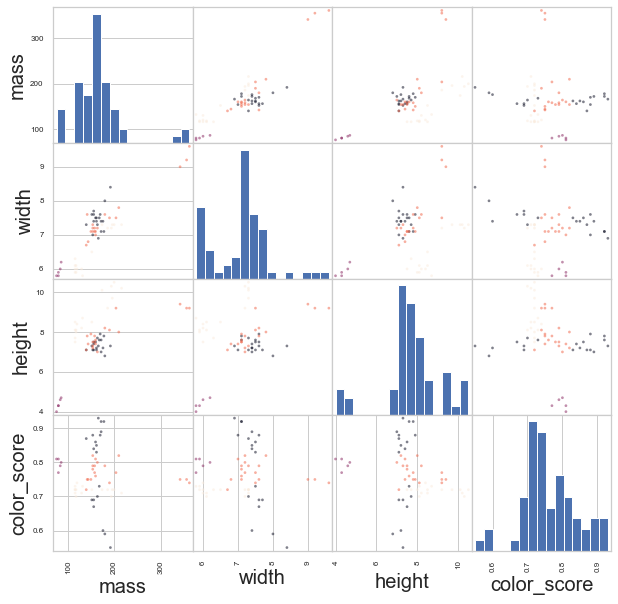

In [11]:
X = fruits.iloc[:,1:]
Y = fruits['fruit_label']
scatter = pd.plotting.scatter_matrix(X, c= Y, marker = '.', s=30, hist_kwds={'bins':15}, figsize=(10,10))
#y labels
temp1=[plt.setp(item.yaxis.get_label(), 'size', 20) for item in scatter.ravel()]
#x labels
temp2=[plt.setp(item.xaxis.get_label(), 'size', 20) for item in scatter.ravel()]

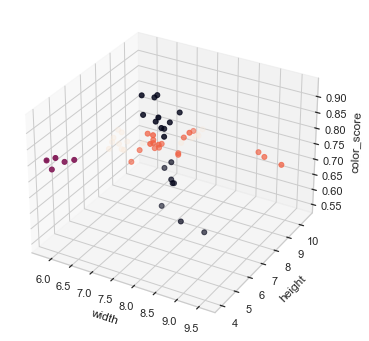

In [12]:
# plotting a 3D scatter plot
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X['width'], X['height'], X['color_score'], c = Y, marker = '.', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Select three features: width, height, color_score

In [13]:
features = fruits.columns[-3:].tolist()
features

['width', 'height', 'color_score']

### Split the data into a Training Set and a Testing Set

In [14]:
X = fruits[features]
Y = fruits['fruit_label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [15]:
X_train.head()

,width,height,color_score
30,7.1,7.5,0.79
41,7.6,8.2,0.79
33,7.5,8.1,0.74
42,7.2,7.2,0.82
48,7.3,10.1,0.72


In [16]:
X_train.shape

(47, 3)

In [17]:
Y_train.shape

(47,)

In [18]:
X_test.shape

(12, 3)

In [19]:
Y_test.shape

(12,)

### Build a Multiclass/Multinomial Logistic Regression (MLR) Classifier

In [20]:
#MLR0 is an instance of the classifier
MLR0 = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='none')

### Train the classifier on the training set (fit the model to the data)

In [21]:
MLR0.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial', penalty='none',
                   solver='newton-cg')

### Use the trained  classifier to classify a sample in  the testing set

In [22]:
sample_test = X_test.iloc[0,:]
sample_test

width          9.60
height         9.20
color_score    0.74
Name: 26, dtype: float64

In [23]:
label_true = Y_test.iloc[0]
print('The true label is', label_true, ':', fruit_lable_to_name[label_true])

The true label is 2 : orange


In [24]:
label_predicted = MLR0.predict([sample_test])
print('The label predicted by the Classifier is', label_predicted[0], ':', fruit_lable_to_name[label_predicted[0]])
if label_predicted[0] == label_true:
    print('Classification is accurate for this testing sample')
else:
    print('Classification is wrong for this testing sample')

The label predicted by the Classifier is 0 : apple
Classification is wrong for this testing sample


C:\Programs\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Classify a sample that is not in the training set nor the testing set

In [25]:
sample_new = [6.0, 4.0, 0.8]
label_predicted = MLR0.predict([sample_new])
print('The label predicted by the classifier is', label_predicted[0], ':', fruit_lable_to_name[label_predicted[0]])

The label predicted by the classifier is 1 : mandarin


C:\Programs\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Evaluate Classifier Performance on the Training Set and the Testing Set

In [26]:
MLR0.score(X_train, Y_train)

0.851063829787234

In [27]:
MLR0.score(X_test, Y_test)

0.8333333333333334

Here is another way to obtain accuracy

In [28]:
Y_train_pred = MLR0.predict(X_train)
accuracy_score(Y_train, Y_train_pred)

0.851063829787234

In [29]:
Y_test_pred = MLR0.predict(X_test)
accuracy_score(Y_test, Y_test_pred)

0.8333333333333334

(4.5, -0.5)

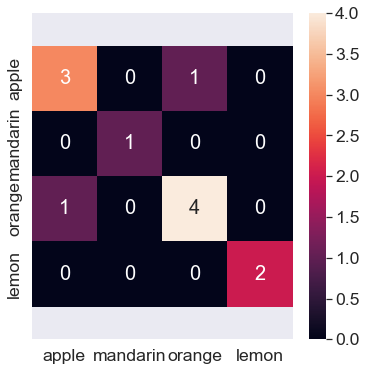

In [30]:
#plot confusion matrix
cm = confusion_matrix(Y_test, Y_test_pred)
df_cm = pd.DataFrame(cm, index = ['apple', 'mandarin', 'orange', 'lemon'],
                     columns = ['apple', 'mandarin', 'orange', 'lemon'])
plt.figure(figsize = (6,6))
sn.set(font_scale=1.6)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 20}, square=True)
ax=plt.gca()
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### put it together

In [31]:
features=['width', 'height', 'color_score']
X = fruits[features]
Y = fruits['fruit_label']
#random split with a fixed percent for testing: 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)           
#define a Multi-class LR classifier
MLR1 = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='none')
#train the classifier
MLR1.fit(X_train, Y_train)
#evaluate the classifier
print('training accuracy=', MLR1.score(X_train, Y_train))
print('testing accuracy=',  MLR1.score(X_test, Y_test))

training accuracy= 0.851063829787234
testing accuracy= 0.8333333333333334


### Normalize features, fit the model, and calculate the accuracy

In [32]:
features=['width', 'height', 'color_score']
X = fruits[features]
Y = fruits['fruit_label']
#random split with a fixed percent for testing: 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)      
#build a minmax transformer
scaler = MinMaxScaler()
#Fit to training data, then transform it.
X_train = scaler.fit_transform(X_train)
#we must apply the same scaling to the test set
X_test = scaler.transform(X_test)
#define a Multi-class LR classifier
MLR2 = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='none')
#train the classifier
MLR2.fit(X_train, Y_train)
#evaluate the classifier
print('training accuracy=', MLR2.score(X_train, Y_train))
print('testing accuracy=',  MLR2.score(X_test, Y_test))

training accuracy= 0.851063829787234
testing accuracy= 0.75


### Let's use two features: width/height, color_score, so that we can visualize the decision boundary

In [33]:
#add a new column named WdH
fruits['WdH']=fruits['width']/fruits['height']
#select the features
features = ['WdH', 'color_score']
X = fruits[features]
Y = fruits['fruit_label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)    
# define a minmax transformer
scaler = MinMaxScaler()
#normalize the training data
X_train = scaler.fit_transform(X_train)
# we must apply the same scaling to the test set
X_test = scaler.transform(X_test)
# define a Multi-class LR classifier    
MLR3 = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='none')
# train the classifier
MLR3.fit(X_train, Y_train)
# evaluate the classifier
print('training accuracy=', MLR3.score(X_train, Y_train))
print('testing accuracy=',  MLR3.score(X_test, Y_test))

training accuracy= 0.8297872340425532
testing accuracy= 0.6666666666666666


### Plot decision boundary to visualize the classification result

C:\Programs\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8248\2405726167.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(xx, yy, Z,cmap='viridis')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8248\2405726167.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(sc, cmap='viridis', ticks=[0, 1, 2, 3]);


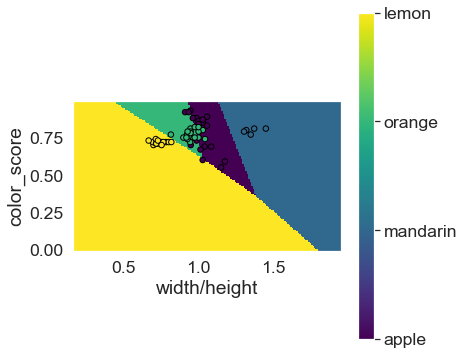

In [34]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X['WdH'].min() - 0.5, X['WdH'].max() + 0.5
y_min, y_max = 0, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xx_r=xx.reshape(xx.shape[0]*xx.shape[1],1)
yy_r=yy.reshape(yy.shape[0]*yy.shape[1],1)
xx_yy = np.concatenate([xx_r, yy_r], axis=1)
xx_yy = scaler.transform(xx_yy)
Z = MLR3.predict(xx_yy)
Z = Z.reshape(xx.shape)
# Put the result into a color plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.pcolormesh(xx, yy, Z,cmap='viridis')
sc=ax.scatter(X['WdH'], X['color_score'],c=Y,cmap='viridis', 
              marker='o',edgecolor = 'black', s=30)
ax.set_xlabel('width/height')
ax.set_ylabel('color_score')
ax.set_aspect('equal')
cbar = fig.colorbar(sc, cmap='viridis', ticks=[0, 1, 2, 3]);
cbar.ax.set_yticklabels(['apple', 'mandarin', 'orange', 'lemon']);